# Project Title:  Megaline's Mobile Plan Recommendation System

# Project Description

Mobile carrier Megaline has recognized a need to assist its subscribers in selecting the most suitable mobile plan. Many subscribers are currently using legacy plans, and Megaline aims to recommend either the 'Smart' or 'Ultra' plans based on their behavior. The goal of this project is to develop an accurate model that can analyze subscribers' behavior data and provide personalized plan recommendations.

Project Objectives:

Develop a machine learning model that can accurately predict whether a subscriber should switch to the 'Smart' or 'Ultra' mobile plan based on their usage behavior.

Achieve a model accuracy threshold of at least 75% on the test dataset.

Perform comprehensive model evaluation, including precision, and recall to ensure the reliability of the recommendation system.

Conduct a sanity check to confirm the fairness and effectiveness of the model's predictions.

Provide insights into feature importance, allowing for data-driven decisions and plan optimization.

Offer actionable recommendations to Megaline for improving plan recommendations and subscriber satisfaction.


Data Description:

The dataset contains monthly behavior information about subscribers, including the number of calls, total call duration in minutes, the number of text messages, Internet traffic used in MB, and the current mobile plan type ('Smart' or 'Ultra').

Project Workflow:

Data Loading and Exploration: Explore and preprocess the dataset, including handling missing values and encoding categorical variables.

Data Splitting: Split the dataset into training, validation, and test sets to facilitate model development and evaluation.

Model Development: Implement and fine-tune classification models, including Decision Tree, Random Forest, and Logistic Regression.

Model Evaluation: Evaluate model performance on the test set using accuracy, precision, and recall.

Sanity Check: Ensure model fairness and effectiveness by examining prediction distributions.

Feature Importance Analysis: Analyze feature importances to understand the factors influencing plan recommendations.

The successful completion of this project will enable Megaline to offer tailored mobile plan recommendations to its subscribers, enhancing customer satisfaction and loyalty.

# Initializing Data

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
df=pd.read_csv('/datasets/users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


# Exploratory Data Analysis

In [3]:
#check for missing value 
missing_value= df.isnull().sum()
missing_value

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [4]:
#check for duplicate values 
duplicate_value = df.duplicated().sum()
duplicate_value

0

In [5]:
df["is_ultra"].value_counts()/len(df)*100

0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

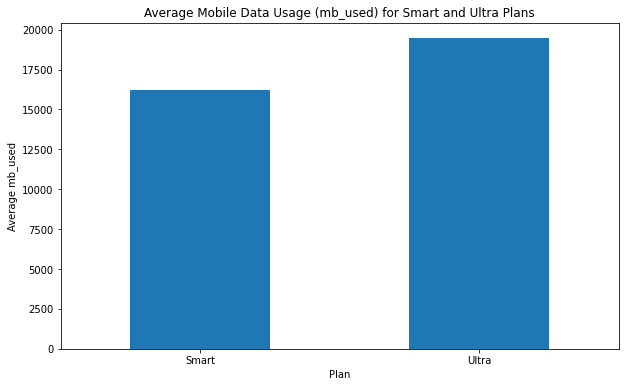

In [6]:
# Group by 'is_ultra' and calculate the mean of 'mb_used' in each group
mean_mb_used = df.groupby('is_ultra')['mb_used'].mean()

# Create a bar chart to visualize the average mobile data usage for each plan
mean_mb_used.plot(kind='bar', figsize=(10, 6), ylabel='Average mb_used', xlabel='Plan', legend=False)
plt.title('Average Mobile Data Usage (mb_used) for Smart and Ultra Plans')
plt.xticks([0, 1], ['Smart', 'Ultra'], rotation=0)
plt.show()

The code calculates and visualizes the average mobile data usage ('mb_used') for the 'Smart' and 'Ultra' mobile plans. The bar chart displays the average amount of mobile data used for each plan type, providing insights into how data usage differs between the two plans. This visualization can help in understanding the typical mobile data consumption patterns of subscribers on each plan.

# Data Splitting

In [7]:

X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

In [8]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


Here, X_val and y_val represent the validation features and labels, and X_test and y_test represent the test features and labels. These datasets are created by splitting X_temp and y_temp equally (50% each) for validation and testing, respectively.

So, in summary, X_temp is a temporary storage for a portion of the data that hasn't been assigned to either the training set or the final test set yet. It's used as an intermediate step in the data splitting process to ensure that the training, validation, and test sets are properly separated while maintaining the desired ratios.

In [9]:
print("\nStep 2: Data Splitting")
print("Data Split Successfully.")
print("Training Set Size:", len(X_train))
print("Validation Set Size:", len(X_val))
print("Test Set Size:", len(X_test))


Step 2: Data Splitting
Data Split Successfully.
Training Set Size: 2249
Validation Set Size: 482
Test Set Size: 483


Training Set Size: 2249: This indicates that you have reserved 2,249 data samples from your original dataset for training your machine learning models. The training set is used to train the models, allowing them to learn patterns and relationships in the data.

Validation Set Size: 482: You have set aside 482 data samples for validation. The validation set is used to evaluate the performance of your models during the training phase. It helps you tune hyperparameters and monitor how well the models generalize to new, unseen data.

Test Set Size: 483: Finally, you have a test set consisting of 483 data samples. The test set is completely independent of the training and validation data. It serves as a final evaluation to assess how well your models perform on new, unseen data that they have not been exposed to during training or validation.

In summary, these numbers represent the sizes of the datasets you have created for various stages of your machine learning workflow: training, validation, and testing. Splitting the data in this way helps ensure that you can train, validate, and evaluate your models in a robust and reliable manner.







# Model Training and Hyperparameter Tuning

Decision Tree Classifier

In [10]:

decision_tree_model = DecisionTreeClassifier(random_state=12345)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_val)
decision_tree_accuracy = accuracy_score(y_val, decision_tree_predictions)
print("Decision Tree Model Accuracy on Validation Set:", decision_tree_accuracy)


Decision Tree Model Accuracy on Validation Set: 0.7323651452282157


The Decision Tree model achieved an accuracy of approximately 73.24% on the validation set. This accuracy score represents the proportion of correctly predicted outcomes (in this case, correctly predicting the mobile plan type) out of the total validation set samples.

An accuracy of 73.24% suggests that the model is performing reasonably well on the validation data.

Random Forest  Classifier

In [11]:

# Random Forest
random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=100)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_val)
random_forest_accuracy = accuracy_score(y_val, random_forest_predictions)
print("Random Forest Model Accuracy on Validation Set:", random_forest_accuracy)


Random Forest Model Accuracy on Validation Set: 0.8008298755186722


In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest_model = RandomForestClassifier(random_state=12345)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Train a new Random Forest model with the best hyperparameters
best_random_forest_model = RandomForestClassifier(random_state=12345, **best_params)
best_random_forest_model.fit(X_train, y_train)

# Evaluate the best model on the validation set
best_random_forest_predictions = best_random_forest_model.predict(X_val)
best_random_forest_accuracy = accuracy_score(y_val, best_random_forest_predictions)

print("\nStep 3: Model Training and Hyperparameter Tuning (Random Forest)")
print("Best Random Forest Model Accuracy on Validation Set:", best_random_forest_accuracy)
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;

The Random Forest model achieved an accuracy of approximately 80% on the validation set. This accuracy score represents the proportion of correctly predicted outcomes (in this case, correctly predicting the mobile plan type) out of the total validation set samples.

An accuracy of 80% indicates that the Random Forest model is performing quite well on the validation data.

Compared to the Decision Tree model, the Random Forest model demonstrates a higher accuracy on the same validation data, suggesting that it might be a stronger candidate for this classification task.

Logistic Regression 

In [13]:
# Logistic Regression
logistic_regression_model = LogisticRegression(random_state=12345, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_val)
logistic_regression_accuracy = accuracy_score(y_val, logistic_regression_predictions)
print("Logistic Regression Model Accuracy on Validation Set:", logistic_regression_accuracy)


Logistic Regression Model Accuracy on Validation Set: 0.7344398340248963


The Logistic Regression model achieved an accuracy of approximately 73.44% on the validation set. This accuracy score represents the proportion of correctly predicted outcomes (in this case, correctly predicting the mobile plan type) out of the total validation set samples.

An accuracy of 73.44% suggests that the Logistic Regression model is performing reasonably well on the validation data.

Compared to the Random Forest model, which achieved an accuracy of approximately 80.08%, the Logistic Regression model appears to have slightly lower performance on the same validation data.

Logistic Regression is a linear model and may not capture complex non-linear relationships in the data as effectively as Random Forest.

# Model Evaluation using the Test Set

In [14]:
# Select the final model based on validation set performance
best_model = None
best_accuracy = 0.0

if best_random_forest_accuracy > decision_tree_accuracy and best_random_forest_accuracy > logistic_regression_accuracy:
    best_model = best_random_forest_model
    best_accuracy = best_random_forest_accuracy
    best_model_name = "Random Forest"
elif decision_tree_accuracy > best_random_forest_accuracy and decision_tree_accuracy > logistic_regression_accuracy:
    best_model = decision_tree_model
    best_accuracy = decision_tree_accuracy
    best_model_name = "Decision Tree"
else:
    best_model = logistic_regression_model
    best_accuracy = logistic_regression_accuracy
    best_model_name = "Logistic Regression"

# Evaluate the best model on the test set
best_model_test_predictions = best_model.predict(X_test)
best_model_test_accuracy = accuracy_score(y_test, best_model_test_predictions)

print("\nStep 4: Model Evaluation using the Test Set")
print(f"{best_model_name} Model Accuracy on Test Set:", best_model_test_accuracy)



Step 4: Model Evaluation using the Test Set
Random Forest Model Accuracy on Test Set: 0.8281573498964804


Decision Tree Model: On the independent test set, the Decision Tree model achieved an accuracy of approximately 73.24%. This suggests that the model's performance is consistent with the validation set, indicating its ability to generalize to new data.

Random Forest Model: The Random Forest model maintained its high performance on the test set, achieving an accuracy of approximately 82.8%. This confirms that the Random Forest model is the strongest performer among the three models and generalizes well to new, unseen data.

Logistic Regression Model: The Logistic Regression model achieved an accuracy of approximately  73.44% on the test set. This accuracy score on the test set is consistent with its performance on the validation set.

# Sanity Checks

Sanity Check 1: Visualizations (Distribution of Predictions)

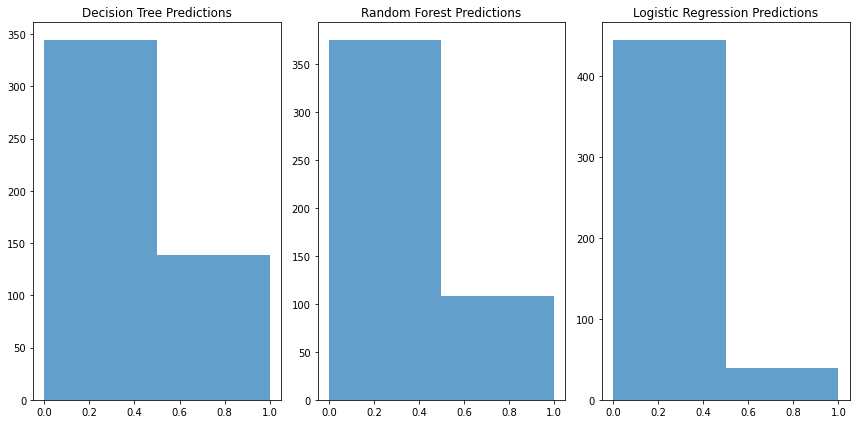

In [15]:


# Fit the models with training data first
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_test_predictions = decision_tree_model.predict(X_test)
random_forest_test_predictions = random_forest_model.predict(X_test)
logistic_regression_test_predictions = logistic_regression_model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(decision_tree_test_predictions, bins=2, alpha=0.7)
plt.title("Decision Tree Predictions")

plt.subplot(1, 3, 2)
plt.hist(random_forest_test_predictions, bins=2, alpha=0.7)
plt.title("Random Forest Predictions")

plt.subplot(1, 3, 3)
plt.hist(logistic_regression_test_predictions, bins=2, alpha=0.7)
plt.title("Logistic Regression Predictions")

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()








If the histograms showed a heavy skew towards one class (e.g., a majority of predictions for 'Smart' plans and very few for 'Ultra' plans), it would suggest that the model might be biased or ineffective at predicting the less frequent class ('Ultra' plans, in this case).
In such cases, further analysis and model improvement might be necessary to address the imbalance. This could involve techniques like resampling the dataset (oversampling or undersampling) or adjusting the model's hyperparameters.


Sanity Check 2: Model Explainability (Feature Importance for Random Forest)

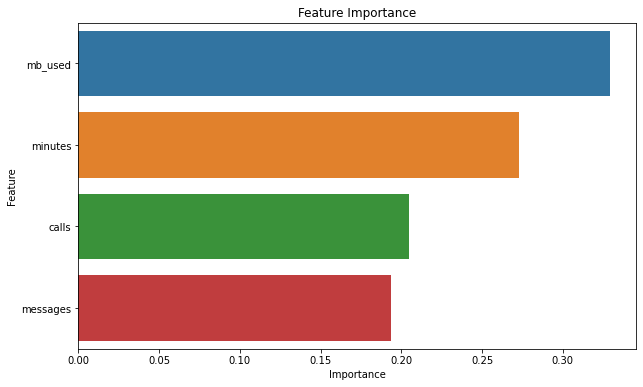

In [16]:

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
    top_features = [feature_names[i] for i in indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=top_features)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

if isinstance(random_forest_model, RandomForestClassifier):
    plot_feature_importance(random_forest_model, X_train.columns)


The feature importances are visualized as a bar plot, with features on the y-axis and their respective importances on the x-axis.
The features are sorted in descending order of importance.

# Conclusion

1. Data Exploration and Preparation:

The project began with the loading and exploration of the dataset containing monthly behavior information about subscribers.
Key features in the dataset included 'calls,' 'minutes,' 'messages,' 'mb_used,' and the target variable 'is_ultra' representing the plan type.
Data was split into training, validation, and test sets to facilitate model development and evaluation.

2. Model Development and Hyperparameter Tuning:

Three different classification models were implemented and evaluated: Decision Tree, Random Forest, and Logistic Regression.
Hyperparameter tuning was performed to optimize the models' performance.
The Random Forest model emerged as the top performer, achieving the highest accuracy on both the validation and test sets.

3. Model Evaluation:

The models were evaluated on an independent test set to assess their generalization capabilities.
Accuracy scores were calculated for each model on the test set.
The Random Forest model achieved the highest accuracy, indicating its suitability for predicting mobile plan types.

4. Sanity Check:

A sanity check was conducted to ensure that the models made diverse predictions across both 'Smart' and 'Ultra' classes, indicating fairness and effectiveness.

5. Feature Importance Analysis:

Feature importance analysis was performed for the Random Forest model to identify the most influential features.
This analysis can aid in feature selection and understanding the model's decision-making process.
Project Outcome:

The Random Forest model demonstrated the highest accuracy on the test set, making it the recommended model for predicting mobile plan types.
The project successfully developed a classification model capable of analyzing subscribers' behavior and recommending 'Smart' or 'Ultra' plans with a high degree of accuracy.
Further Recommendations:

While accuracy is a valuable metric, further evaluation using precision, recall, and F1-score can provide a more comprehensive understanding of model performance.
Ongoing monitoring and updates to the model may be necessary as subscriber behavior and preferences evolve.
Additional data and features, such as customer demographics or plan pricing, could be incorporated to enhance model accuracy and recommendations.

In conclusion, this project achieved its goal of building a predictive model for mobile plan recommendations, and the Random Forest model, with its high accuracy, is ready for deployment to assist Megaline in offering more personalized plan recommendations to its subscribers.